In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import math

import statsmodels.api as sm

In [80]:
touch_files = ["lb-touch-1.csv", "lb-touch-2.csv",
                "lb-touch-3.csv", "lb-touch-4.csv",
                "lb-touch-5.csv"]

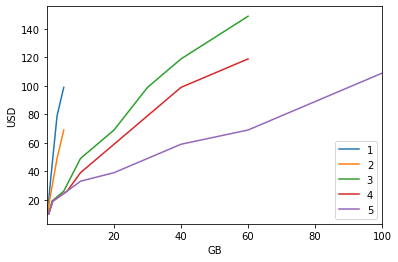

In [142]:
fig, ax = plt.subplots()

for idx, f in enumerate(touch_files):
    df = pd.read_csv(f)
    df.plot(ax=ax, kind="line", x="quota", y="price", label=str(idx + 1))

# x = np.linspace(10**0,10**2,10)
# y = 21*(x**(1)) + 10

# plt.plot(x, y, "black")

ax.set_xlabel("GB")
ax.set_ylabel("USD")

fig.show()

In [151]:
df = pd.read_csv(touch_files[0])

model_X = df["quota"]
model_y = df["price"]

model = sm.OLS(model_y, model_X).fit()

model.summary()

C:\Users\firas\envs\visicope\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              131.0
Date:                Mon, 30 Mar 2020   Prob (F-statistic):                    0.000333
Time:                        00:42:29   Log-Likelihood:                         -18.703
No. Observations:                   5   AIC:                                      39.41
Df Residuals:                       4   BIC:                                      39.02
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
quota         21.9659      1.919     11.444      0.000      16.637      27.295
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.127
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.442
Skew:                          -1.315   Prob(JB):                        0.486
Kurtosis:                       3.036   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

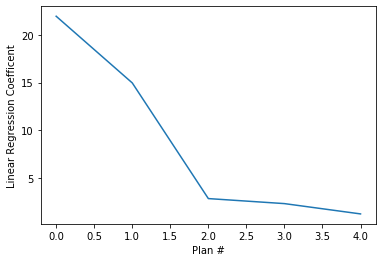

In [141]:

x = range(len(touch_files))
y = []

for idx, f in enumerate(touch_files):
    df = pd.read_csv(f)

    model_X = df["quota"]
    model_y = df["price"]

    model = sm.OLS(model_y, model_X).fit()

    y.append(model.params[0])

fig, ax = plt.subplots()

plt.plot(x, y)

ax.set_xlabel("Plan #")
ax.set_ylabel("Linear Regression Coefficent")

fig.show()


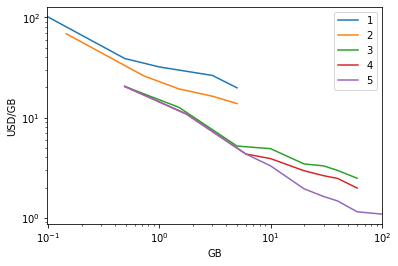

In [161]:
fig, ax = plt.subplots()

for idx, f in enumerate(touch_files):
    df = pd.read_csv(f)
    df["per_dollar"] = df["price"] / df["quota"]
    df.plot(ax=ax, loglog=True, kind="line", x="quota", y="per_dollar", label=str(idx + 1))

# x = np.linspace(10**0,10**2,10)
# y = 10**(np.log(3*(x**(-.24))))

# plt.plot(x, y, "black")

ax.set_xlabel("GB")
ax.set_ylabel("USD/GB")

fig.show()

In [159]:
df = pd.read_csv(touch_files[2])

model_X = np.log(df["quota"])
model_y = np.log(df["price"] / df["quota"])

model = sm.OLS(model_y, model_X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.279
Model:                            OLS   Adj. R-squared (uncentered):              0.177
Method:                 Least Squares   F-statistic:                              2.715
Date:                Mon, 30 Mar 2020   Prob (F-statistic):                       0.143
Time:                        00:44:27   Log-Likelihood:                         -14.720
No. Observations:                   8   AIC:                                      31.44
Df Residuals:                       7   BIC:                                      31.52
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
quota          0.3480      0.211      1.648      0.143      -0.151       0.847
==============================================================================
Omnibus:                        1.754   Durbin-Watson:                   0.166
Prob(Omnibus):                  0.416   Jarque-Bera (JB):                1.007
Skew:                           0.791   Prob(JB):                        0.605
Kurtosis:                       2.282   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-0.5114528261588609
-0.08438904545548098
0.347998509014786
0.2923982464592811
0.1304231910878128


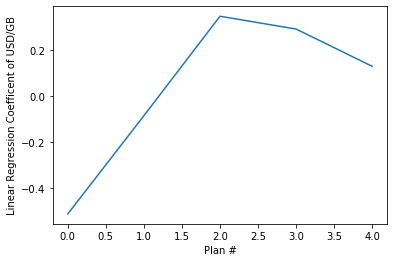

In [150]:
x = range(len(touch_files))
y = []

for idx, f in enumerate(touch_files):
    df = pd.read_csv(f)

    model_X = np.log10(df["quota"])
    model_y = np.log10(df["price"] / df["quota"])

    model = sm.OLS(model_y, model_X).fit()

    y.append(model.params[0])
    print(model.params[0])

fig, ax = plt.subplots()

plt.plot(x, y)

ax.set_xlabel("Plan #")
ax.set_ylabel("Linear Regression Coefficent of USD/GB")

fig.show()